In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
os.getcwd()

'C:\\Users\\HP\\Desktop\\BMU\\Study\\Module 6\\Analytics\\ML'

In [3]:
os.chdir("C:\\Users\\HP\\Desktop\\MY PORTFOLIO\\Github")

In [4]:
os.getcwd()

'C:\\Users\\HP\\Desktop\\MY PORTFOLIO\\Github'

In [5]:
# Options for Decimal Places
# We do this to avoid exponential form/representation of data that is big
pd.options.display.float_format = '{:.2f}'.format

In [6]:
df_BO = pd.read_csv("BackOrders.csv")

In [7]:
df_BO.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,nan,0,0,0,0,0,0,15,...,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1,1870557,7,2.00,0,0,0,0,0,0,0,...,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.00,10,10,77,184,46,132,256,...,0,0.54,0.70,0,No,No,No,Yes,No,No
3,1758220,46,2.00,0,0,0,0,1,2,6,...,0,0.75,0.90,0,Yes,No,No,Yes,No,No
4,1360312,2,2.00,0,4,6,10,2,2,5,...,0,0.97,0.92,0,No,No,No,Yes,No,No


In [8]:
# Check the dimensions
df_BO.shape

(61589, 23)

In [9]:
# Check the data types
df_BO.dtypes

# Always tally the data types with the Data Definition provided to check whether it is correct or not

sku                    int64
national_inv           int64
lead_time            float64
in_transit_qty         int64
forecast_3_month       int64
forecast_6_month       int64
forecast_9_month       int64
sales_1_month          int64
sales_3_month          int64
sales_6_month          int64
sales_9_month          int64
min_bank               int64
potential_issue       object
pieces_past_due        int64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty           int64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [10]:
# See the summary statistics of the Numerical variables
df_BO.describe()

# This code gives the summary stats of only the numeric variables

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,61589.00,61589.00,58186.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00,61589.00
mean,2037187.68,287.72,7.56,30.19,169.27,315.04,453.58,44.74,150.73,283.55,419.64,43.09,1.61,-6.26,-5.86,1.21
std,656417.82,4233.91,6.50,792.87,5286.74,9774.36,14202.01,1373.81,5224.96,8872.27,12698.58,959.61,42.31,25.54,24.84,29.98
min,1068628.00,-2999.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-99.00,-99.00,0.00
25%,1498574.00,3.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.64,0.00
50%,1898033.00,10.00,8.00,0.00,0.00,0.00,0.00,0.00,2.00,4.00,6.00,0.00,0.00,0.82,0.80,0.00
75%,2314826.00,57.00,8.00,0.00,12.00,25.00,36.00,6.00,17.00,34.00,51.00,3.00,0.00,0.96,0.95,0.00
max,3284895.00,673445.00,52.00,170976.00,1126656.00,2094336.00,3062016.00,295197.00,934593.00,1799099.00,2631590.00,192978.00,7392.00,1.00,1.00,2999.00


In [11]:
# To see the summary stats of the categorical variables we need to use the following code

df_BO.describe(include = 'object')

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,61589,61589,61589,61589,61589,61589,61589
unique,2,2,2,2,2,2,2
top,No,No,No,No,Yes,No,No
freq,61509,48145,61577,53792,59303,61569,50296


In [12]:
# we can see that the 'sku' variable is not important as it only provides us with the product id
# Axis = 1 tells the drop() to search for the name in the columns
# So Drop the sku variable

# df_BO = df_BO.drop('sku', axis = 1)

# OR

df_BO.drop('sku', axis = 1, inplace = True)

In [13]:
# Check the missing values
df_BO.isnull().sum()*100/df_BO.shape[0]

# here in stead of 'df_BO.shape[0]' we can use 'len(df_BO)'

national_inv        0.00
lead_time           5.53
in_transit_qty      0.00
forecast_3_month    0.00
forecast_6_month    0.00
forecast_9_month    0.00
sales_1_month       0.00
sales_3_month       0.00
sales_6_month       0.00
sales_9_month       0.00
min_bank            0.00
potential_issue     0.00
pieces_past_due     0.00
perf_6_month_avg    0.00
perf_12_month_avg   0.00
local_bo_qty        0.00
deck_risk           0.00
oe_constraint       0.00
ppap_risk           0.00
stop_auto_buy       0.00
rev_stop            0.00
went_on_backorder   0.00
dtype: float64

In [14]:
df_BO = df_BO.dropna(axis=0)

In [15]:
df_BO.shape

(58186, 22)

In [16]:
# To build a Decision tree model the following steps need to be followed:
 # 1. EDA
 # 2. Outlier Treatment
 # 3. Separate the numeric features(independent variables) and categorical features
 # 4. Standardize the numerical features (scaling/ standardizing teh numeric variable is optional) and encoding the categorical features (this is very important and needs to be done)
 # 5. Concatenate the data

In [17]:
# perform encoding on Categorical variables

# Separate out the categorical variables
categorical_vars = df_BO.select_dtypes(include = ['object']).columns
print(categorical_vars)

Index(['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')


In [18]:
# One hot encoding so we do not use drop_first = True
# Generally we do not use (n-1) dummy encoding in Decision tree
df_encoded = pd.get_dummies(columns = categorical_vars, data=df_BO)

# Please Note: We simply mention the categorical variables to the get_dummies()
# It keeps the numeric variables as-is and encodes the categorical vraiable
# So we do not need to explicitely concatenate numeric and encoded variables 

In [19]:
df_encoded.head(20)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,oe_constraint_No,oe_constraint_Yes,ppap_risk_No,ppap_risk_Yes,stop_auto_buy_No,stop_auto_buy_Yes,rev_stop_No,rev_stop_Yes,went_on_backorder_No,went_on_backorder_Yes
1,7,2.00,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,1,0
2,258,15.00,10,10,77,184,46,132,256,365,...,1,0,1,0,0,1,1,0,1,0
3,46,2.00,0,0,0,0,1,2,6,9,...,1,0,1,0,0,1,1,0,1,0
4,2,2.00,0,4,6,10,2,2,5,6,...,1,0,1,0,0,1,1,0,1,0
5,297,12.00,0,0,0,0,5,6,44,57,...,1,0,1,0,0,1,1,0,1,0
6,3285,8.00,0,0,0,0,18,81,162,304,...,1,0,1,0,0,1,1,0,1,0
7,6,2.00,0,0,3,9,1,5,8,13,...,1,0,1,0,0,1,1,0,0,1
8,99,8.00,0,46,169,225,2,22,176,263,...,1,0,1,0,0,1,1,0,1,0
9,52,2.00,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,1,0
11,0,12.00,0,8,11,17,0,3,10,13,...,1,0,1,0,0,1,1,0,0,1


In [20]:
df_encoded.drop('went_on_backorder_No', axis = 1, inplace = True)

In [21]:
# Let's see the distribution of the target variable
df_encoded['went_on_backorder_Yes'].value_counts()

0    47217
1    10969
Name: went_on_backorder_Yes, dtype: int64

In [22]:
# We separate the independent and the dependent target variable
df_target = df_encoded['went_on_backorder_Yes']
df_independent = df_encoded.drop('went_on_backorder_Yes', axis = 1)

In [23]:
df_target.shape

(58186,)

In [24]:
df_independent.shape

(58186, 27)

In [25]:
# Perform Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_independent, df_target, random_state = 1, test_size = 0.3)

# We took test size of 0.3 or 30% because we have a pretty large dataset and we would like to give more data for training.

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40730, 27)
(17456, 27)
(40730,)
(17456,)


In [27]:
X_train

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,deck_risk_No,deck_risk_Yes,oe_constraint_No,oe_constraint_Yes,ppap_risk_No,ppap_risk_Yes,stop_auto_buy_No,stop_auto_buy_Yes,rev_stop_No,rev_stop_Yes
48130,-1,8.00,3,5,6,9,2,7,10,12,...,1,0,1,0,1,0,0,1,1,0
47482,6,8.00,0,11,11,11,1,5,14,22,...,1,0,1,0,1,0,0,1,1,0
12026,9,2.00,0,0,14,35,2,9,22,46,...,1,0,1,0,1,0,0,1,1,0
44136,12,8.00,0,0,4,10,3,8,9,12,...,1,0,1,0,1,0,0,1,1,0
53834,82,12.00,0,0,0,0,4,5,8,13,...,1,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52946,72,8.00,28,124,256,398,39,112,244,350,...,1,0,1,0,0,1,0,1,1,0
34358,16,8.00,0,0,0,6,8,16,23,44,...,1,0,1,0,1,0,0,1,1,0
5481,129,2.00,0,0,0,0,5,26,31,31,...,0,1,1,0,1,0,0,1,1,0
12890,129,8.00,3,0,0,100,6,29,110,138,...,1,0,1,0,1,0,0,1,1,0


In [28]:
from sklearn import tree
# For algorithms which can be used for both classification and regression,
# sklearn provides us with different modules

model_tree = tree.DecisionTreeClassifier(max_depth = 3)
# We use Decision Tree Classifier as our target variable is Categorical in nature
model_DT = model_tree.fit(X_train, y_train)

In [29]:
model_DT

DecisionTreeClassifier(max_depth=3)

In [30]:
import sklearn
sklearn.__version__

'0.23.1'

In [31]:
!pip install pydotplus

In [32]:
!pip install graphviz

# OR

# !conda install graphviz

In [33]:
import pydotplus
import graphviz

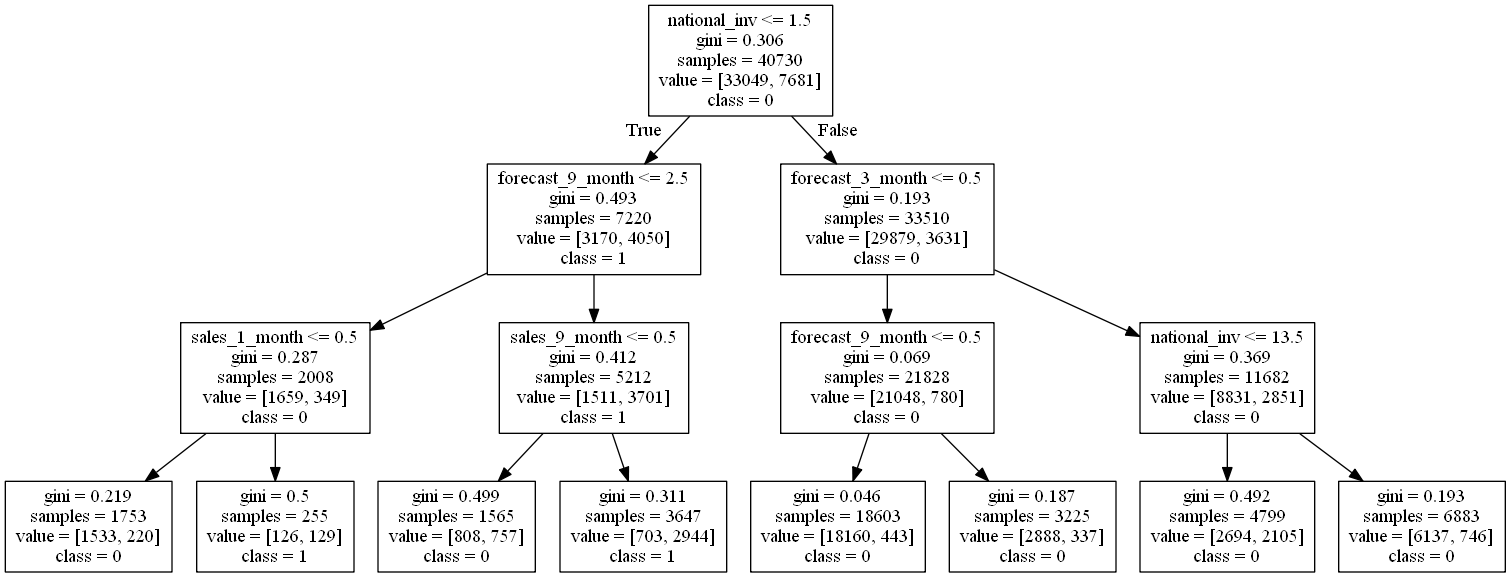

In [34]:
from IPython.display import Image

labels = X_train.columns

tree_viz = tree.export_graphviz(model_DT, feature_names = labels, class_names = ["0","1"])

graph = pydotplus.graph_from_dot_data(tree_viz)
Image(graph.create_png())

In [35]:
# max_depth = 3 means there will be 3 levels of branches including the root
# Decision trees are very prone to overfitting (model working well on train data but not on test data).

# National INV. is taken as the root node because it has the highest Information gain.
# Forecast_9_month has the highest Information Gain while making the sub-branches

# The last node is known as the 'leaf-node' or the 'decision-node'

# After National_inv has been selected as the root node, the National_inv is excluded and the Information gain is found out of
# all the other variables. Through this we got Forecast_9_month as the next root node. Then according to the set
# threshold we get the true/false division of values.


In [36]:
train_pred = model_DT.predict(X_train)
test_pred = model_DT.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix

train_cm = confusion_matrix(y_train, train_pred)
test_cm = confusion_matrix(y_test, test_pred)

In [38]:
print(train_cm)
print(test_cm)

[[32220   829]
 [ 4608  3073]]
[[13793   375]
 [ 1965  1323]]


In [39]:
accuracy_train = (train_cm[0,0]+train_cm[1,1])/(train_cm[0,0]+train_cm[0,1]+train_cm[1,0]+train_cm[1,1])
print(accuracy_train)

0.8665111711269334


In [40]:
accuracy_test = (test_cm[0,0]+test_cm[1,1])/(test_cm[0,0]+test_cm[0,1]+test_cm[1,0]+test_cm[1,1])
print(accuracy_test)

0.865948670944088


In [41]:
# The accuracy of both Train and Test data is good. And the difference between their accuracy is very less.
# This shows that the model is working well for both train and test data and so the model is NOT OVERFITTING

### 1. At max_depth = 3 my train accuracy is 0.866 and test accuracy is 0.865
### 2. At max_depth = 5 my train accuracy is 0.893 and test accuracy is 0.88
### 3. At max_depth = 6 my train accuracy is 0.897 and test accuracy is 0.890
### 4. At max_depth = None my train accuracy is 0.99 and test accuracy is 0.89


The difference in test accuracy is not much in point 2,3,4
However, in point 4, we notice the difference between the train and test accuracy is higher compared to point 2,3

### Calculate the Sensitivity, Specificity and Precision on Test result

# Sensitivity

In [42]:
# True Positive Rate
sens_test = (test_cm[0,0])/(test_cm[1,0]+test_cm[0,0])
sens_test

0.8753014341921563

# Specificity

In [43]:
# True Negative Rate
spec_test = (test_cm[1,1])/(test_cm[0,1]+test_cm[1,1])
print(spec_test)

0.7791519434628975


# Precision

In [44]:
# TP/(TP+FP)
prec_test = (test_cm[0,0])/(test_cm[0,1]+test_cm[0,0])
prec_test

0.973531902879729

In [45]:
# TN, FP, FN, TP - Flow of Confusion matrix in sklearn. The matrix will be printed according to this flow.